# 数列极限: 圆面积的正多边形逼近

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

# Step 2: 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体为黑体
plt.rcParams['axes.unicode_minus'] = False    # 正常显示负号

### 实验1：圆的面积 - 正多边形逼近法

阿基米德用正多边形逼近圆：当边数 $n \to \infty$ 时，正 $n$ 边形面积 $\to$ 圆面积  
单位圆面积公式：$\displaystyle S = \lim_{n \to \infty} \frac{1}{2} n \sin(\frac{2\pi}{n})$

In [5]:
def regular_polygon_area(n, radius=1):
    """计算正n边形面积"""
    theta = 2 * np.pi / n
    return 0.5 * n * radius**2 * np.sin(theta)

# 参数设置
radius = 1
n_values = [4, 8, 16, 32, 64, 128, 256]  # 边数变化
areas = [regular_polygon_area(n, radius) for n in n_values]
true_area = np.pi * radius**2

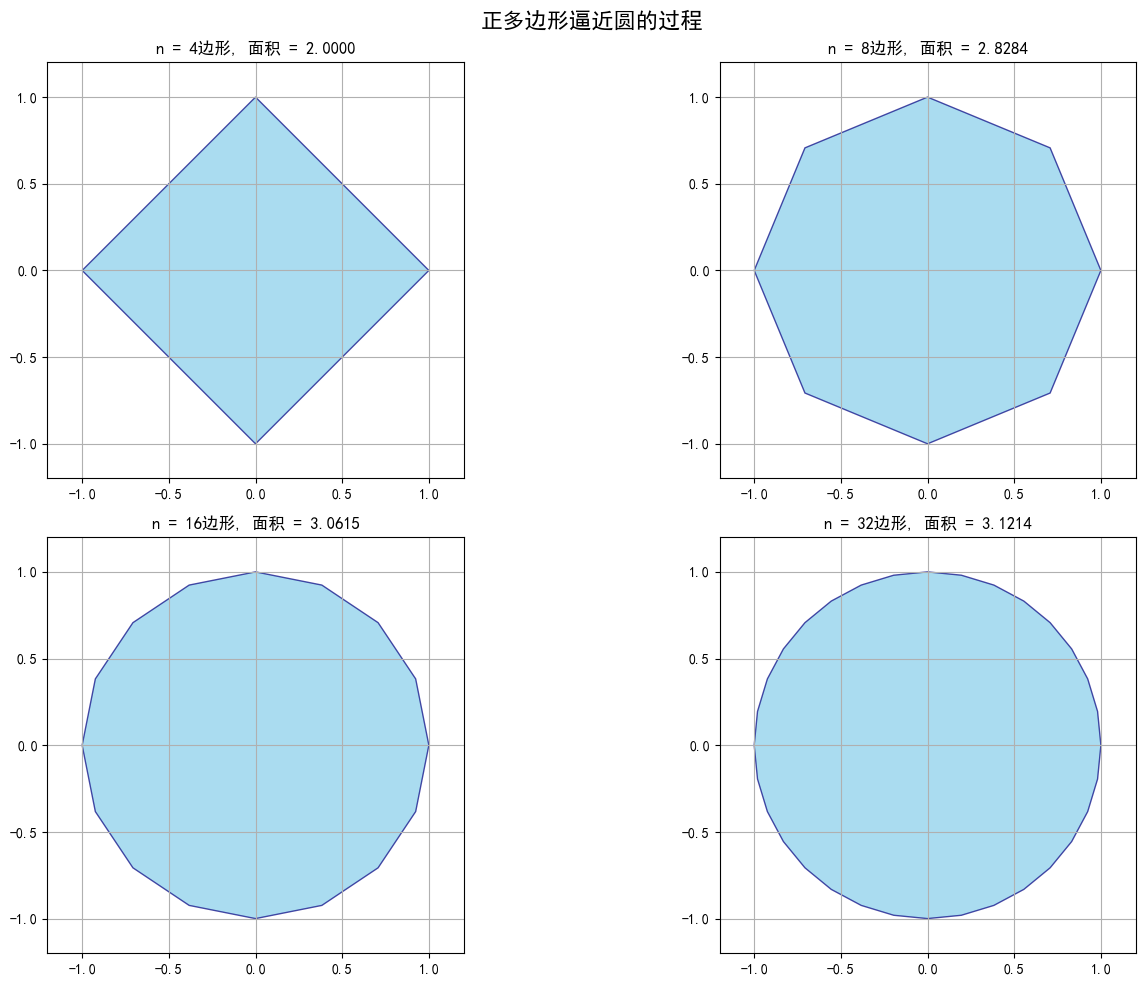

In [6]:
# 可视化逼近过程
plt.figure(figsize=(15, 10))
for i, n in enumerate([4, 8, 16, 32]):
    ax = plt.subplot(2, 2, i+1)
    angles = np.linspace(0, 2*np.pi, n+1)
    vertices = np.array([[np.cos(theta), np.sin(theta)] for theta in angles])
    polygon = Polygon(vertices, closed=True, fc='skyblue', ec='navy', alpha=0.7)
    ax.add_patch(polygon)
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1.2, 1.2)
    ax.set_aspect('equal')
    ax.set_title(f'n = {n}边形, 面积 = {regular_polygon_area(n):.4f}')
    ax.grid(True)

plt.suptitle('正多边形逼近圆的过程', fontsize=16)
plt.tight_layout()
plt.show()

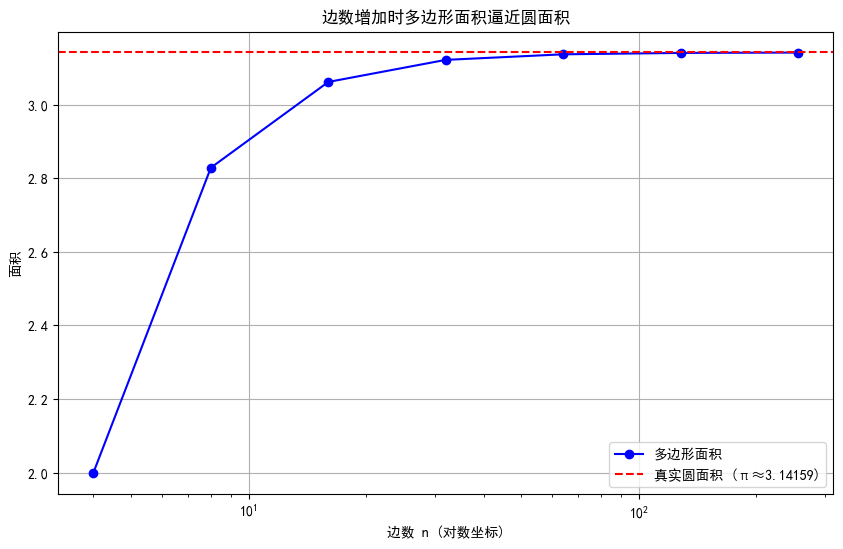

In [8]:
# 展示逼近效果
plt.figure(figsize=(10, 6))
plt.plot(n_values, areas, 'bo-', label='多边形面积')
plt.axhline(y=true_area, color='r', linestyle='--', label=f'真实圆面积 (π≈{np.pi:.5f})')
plt.xscale('log')
plt.xlabel('边数 n (对数坐标)')
plt.ylabel('面积')
plt.title('边数增加时多边形面积逼近圆面积')
plt.legend()
plt.grid(True)
plt.show()

**运行结果与思考**：
1. 当n=256时，面积≈3.14158，与π仅差0.00001！
2. 无限细分时，折线变曲线，"直"与"曲"在极限下统一.